<a href="https://colab.research.google.com/github/rishikaranjan/Uber/blob/main/Uber_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
dataset = pd.read_csv('uber-data-aug14.csv')
x = dataset.iloc[ : , [1,2]].values

In [41]:
print(x)

[[ 40.7366 -73.9906]
 [ 40.726  -73.9918]
 [ 40.7209 -74.0507]
 ...
 [ 40.7617 -73.9788]
 [ 40.7395 -73.9889]
 [ 40.727  -73.9802]]


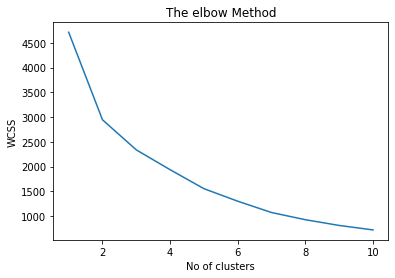

In [42]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans = KMeans(n_clusters = 6 , init = 'k-means++' , random_state = 42) 

y_kmeans = kmeans.fit_predict(x)

In [44]:
print(y_kmeans)

[1 1 1 ... 0 1 1]


In [64]:
centroids = kmeans.cluster_centers_

centroids

array([[ 40.76779254, -73.97091722],
       [ 40.73151242, -73.99752656],
       [ 40.66795133, -73.7563892 ],
       [ 40.68643773, -73.96294972],
       [ 40.69997732, -74.20075322],
       [ 40.79660299, -73.87305668]])

In [96]:
new_location = [(40.76779254 , -73.97091722)]
kmeans.predict(new_location)

array([0], dtype=int32)

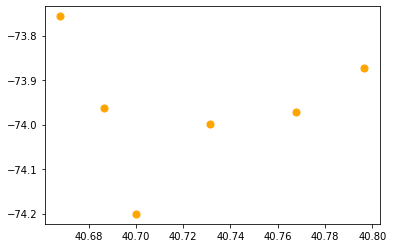

In [66]:
plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[:, 1] , s = 50 , c = 'orange' , label = 'Centroid')

In [99]:
import folium

map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 10)

for p in range(0,len(centroids)):
    # folium.Marker(centroids[p], popup = centroids[p]).add_to(map)
    folium.Marker(centroids[p], popup = "points").add_to(map)
    
map
